<a href="https://colab.research.google.com/github/ZafarBukhari/AI-ISB-Q2/blob/master/Deep_Learning/RegProblem_CostFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
# weight-height Dataset uploaded into google colab
import io

from google.colab import files
uploaded = files.upload()

Saving weight-height.csv to weight-height.csv


In [9]:
# made DataFram 'df' using IO stream
df = pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [14]:
X = df[['Height']].values
y_true = df[['Weight']].values

In [15]:
def line(x, w=0, b=0):
  return w*x+b

def mean_squared_error(y_true, y_pred):
  s = (y_true - y_pred) ** 2
  return np.sqrt(s.mean())

Text(0.5, 0, 'b')

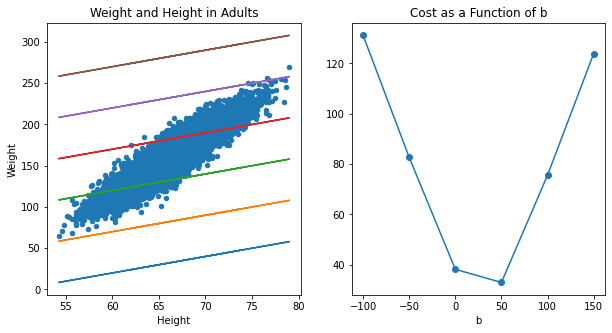

In [18]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x = 'Height',
        y = 'Weight',
        title = 'Weight and Height in Adults', ax = ax1)

bs = np.array([-100,-50,0,50,100,150])
mses = []
for b in bs:
  y_pred = line(X, w=2, b=b)
  mse = mean_squared_error(y_true, y_pred)
  mses.append(mse)
  plt.plot(X, y_pred)

ax2 = plt.subplot(122)
plt.plot(bs, mses, 'o-')
plt.title('Cost as a Function of b')
plt.xlabel('b')

## **Linear Regression with Keras**

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [22]:
X.shape

(10000, 1)

In [23]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [28]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 1s 946us/step - loss: 1411.9896
Epoch 2/40
313/313 [==============================] - 0s 960us/step - loss: 561.6331
Epoch 3/40
313/313 [==============================] - 0s 927us/step - loss: 535.6578
Epoch 4/40
313/313 [==============================] - 0s 932us/step - loss: 512.8945
Epoch 5/40
313/313 [==============================] - 0s 926us/step - loss: 457.8961
Epoch 6/40
313/313 [==============================] - 0s 957us/step - loss: 427.2515
Epoch 7/40
313/313 [==============================] - 0s 906us/step - loss: 400.6094
Epoch 8/40
313/313 [==============================] - 0s 890us/step - loss: 354.5519
Epoch 9/40
313/313 [==============================] - 0s 869us/step - loss: 312.1630
Epoch 10/40
313/313 [==============================] - 0s 934us/step - loss: 308.2104
Epoch 11/40
313/313 [==============================] - 0s 891us/step - loss: 263.4763
Epoch 12/40
313/313 [==============================] - 0s 948u

In [29]:
y_pred = model.predict(X)

In [30]:
y_pred

array([[214.14621 ],
       [175.55771 ],
       [216.1506  ],
       ...,
       [138.12103 ],
       [177.48007 ],
       [123.464966]], dtype=float32)

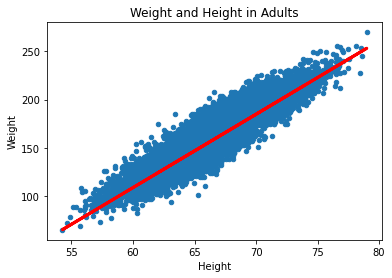

In [32]:
df.plot(kind = 'scatter',
        x = 'Height',
        y = 'Weight',
        title = 'Weight and Height in Adults')
plt.plot(X, y_pred, color='red', linewidth=3)

In [33]:
w,b = model.get_weights()

In [34]:
w

array([[7.618499]], dtype=float32)

In [35]:
b

array([-348.45718], dtype=float32)

In [37]:
model.predict([[200]])

array([[1175.2426]], dtype=float32)